##Lasso and Ridge Regularization (Linear Regression)

**1.1 Introduction**

In machine learning when we use supervised learning algorithms on a data set, there will be situations where the model performs really well on train data and when tested on new data it might not perform well and also has high error. This is due to multiple reasons like collinearity, bias-variance decomposition and over modeling on train data. Dealing with collinearity is discussed in [my previous blog](https://medium.com/all-about-ml/linear-regression-d41a6a5dcab6)

**1.2 Bias Variance Trade off**

Bias and Variance are the measures which helps us understand how deviation of the function is varied. Bias is the measure of deviation or error from actual value of the function. Variance measures deviation in response variable function if we estimated it with a different training sample of data set.
- From the definitions it can be inferred that while modelling we must keep bias as low as possible that implies accuracy is high
- Also by changing samples in training data set, one should not get highly varied results of the output. Therefore low variance is preferred for a good performing model

But here comes a catch,

If we try to reduce the bias, then the model would fit exactly well on that specific sample of training data and it cannot find the underlying patterns in the data set that it has never seen. So it is very likely that the model will have deviated output when another sample is used for training. This then results in high variance.
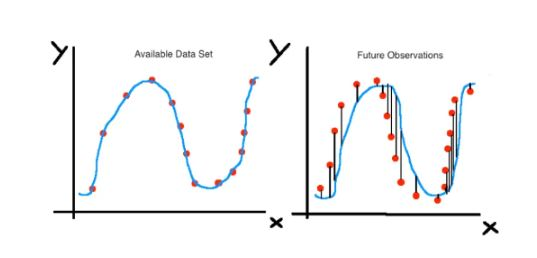


Similarly when we want to have less deviation or low variance when different samples are used then, the model will not fit exactly on the data points and results in high bias

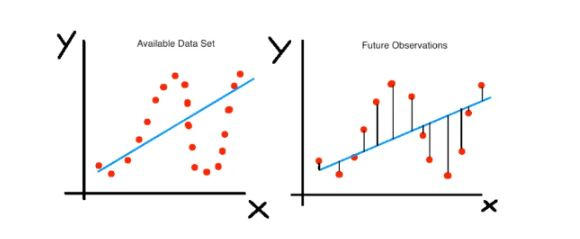

**1.3 Overfitting**

The situation where we had low bias and high variance is called overfitting as the model fits absolutely well with high accuracy on available data and when it sees a new data it fails to predict, leading to high test error. 

This generally happens with data that has many features and the model considers the contribution of the estimated coefficients of all of them and tries to over estimate the actual value. But in reality it might be the case that only few features of the data set are really important and impact the predictions. So if the less impactful features are more in number they tend to add value to the function in training data and when new data comes up that has nothing to do with these features then the predictions goes wrong.

**1.4 Regularization:**

So it is highly important to restrict the features while modelling to minimize the risk of overfitting and this process is called **regularization**.

In **regression** we know that the features are estimated using coefficients and these estimates are the real game changes in modelling. If there is a possibility to ‘restrict’ or ‘shrink’ or ‘regularize’ the estimates towards zero, then the effect of the non- impactful features is reduced and it saves the model from high variance with a stable fit. In terms of a typical linear regression model using ordinary least squares, this is done by modifying our typical loss function (Residual Sum of Squares, RSS) by adding a penalty for higher magnitude coefficient values.

There are few things to keep in mind while using regularization. There needs to be a constant lookup on bias Vs. variance trade off while using the shrinkage parameter. The more we shrink the coefficients the more we reduce the variance which might pitch in high bias. Noting all the trade offs we now proceed to learn the regularization techniques

**2.1 Ridge and Lasso Regularization**

**Ridge Regularization:**

Recall from the [previous blog](https://medium.com/all-about-ml/linear-regression-d41a6a5dcab6) where we discussed about RSS and how it helps in estimating the coefficients by reducing RSS.

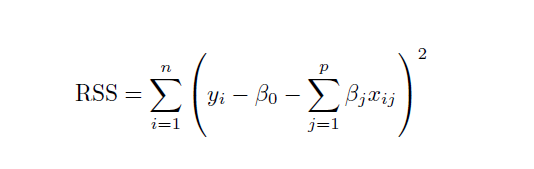

* Ridge regression is quite similar to RSS except that there is also a shirnkage parametre ‘λ’ that minimizes their value. ‘λ’ is also called as ‘tuning parametre’ and it is determined separately using cross-validation technique

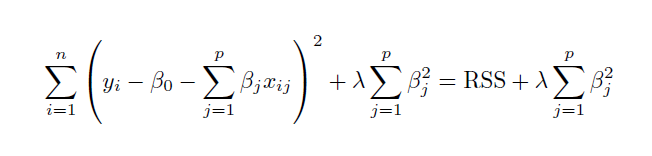

* Suppose the coefficients β1, . . . , βp are having some values and out of them few must have values already close to zero which as discussed above where features that do no have much impact on the response variable. When we add the shrinkage parametre these values which are already having small value will tend to zero in the equation shown above. So, the second term after RSS is called shrinkage penalty or l2 norm.
* If λ=0 then the equation is as normal as RSS, but if λ → ∞, the impact of shrinkage penalty increases and the ridge regression estimate coefficients will approach to zero.
* Ridge regression’s advantage over least squares is rooted in the bias-variance trade-off. As λ increases, the flexibility of the ridge regression fit decreases, leading to decreased variance but increased bias.
* Ridge regression does have one disadvantage. Ridge regression will include all p predictors in the final model. The shrinkage penalty will shrink all of the coefficients towards zero, but it will not set any of them exactly to zero (unless λ = ∞). So we need to resort to step wise selection models again to pick up the important features.

**Lasso Regularization:**
To overcome the problem that ridge has, Lasso(Least Absolute Shrinkage and Selection Operator) is an alternative that can pick relevant features that will be useful for modelling. Lasso also has the shrinkage parametre but the difference that has with Ridge is that there is no squared term of the estimated coefficient but only an absolute value.

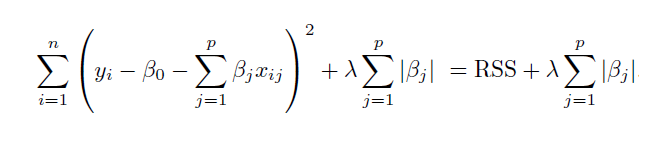

* Like in Ridge regression, lasso also shrinks the estimated coefficients to zero but the penalty effect will forcefully make the coefficients equal to zero if the tuning parameter is large enough. Hence, much like best subset selection, the lasso performs feature selection. As a result, models generated from the lasso are generally much easier to interpret.
* The term after RSS is called the shrinkage penalty or l1 norm

**Lasso & Ridge Regularization**

Now lets get some hands on with house prices data set. We need to predict the prices of houses given some features. Lets import the dependencies and data that we need to use

In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import ensemble
from sklearn.linear_model import Lasso,Ridge


In [14]:
#load train data
df_data=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Machine Learning/Regression regularization/Data_Price.csv")
df_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [15]:
#to know each and every column execute the following
print(df_data.columns)
print(df_data.shape)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [16]:
#As we have a basic idea on the data lets see how to deal with Null values in it
total = df_data.isnull().sum().sort_values(ascending=False)
percent = (df_data.isnull().sum()/df_data.isnull().count()).sort_values(ascending=False)

In [17]:
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


We can drop the columns having more than 15% of null values. So the columns till ‘LotFrontage’ can be removed. If we check the columns like ‘GarageXXXX’ they seem to be related with Garage area and we can remove them as well are they are collinear. Similar case with ‘BsmtXXX’ and ‘MasVnrXXXX’. For ‘Electrical’ there is only one datapoint that is null. So we can remove that specific row from the data.

In [18]:
df_data= df_data.drop(missing_data[missing_data['Total']>1].index.values,1)
df_data= df_data.drop(df_data.loc[df_data['Electrical'].isnull()].index)

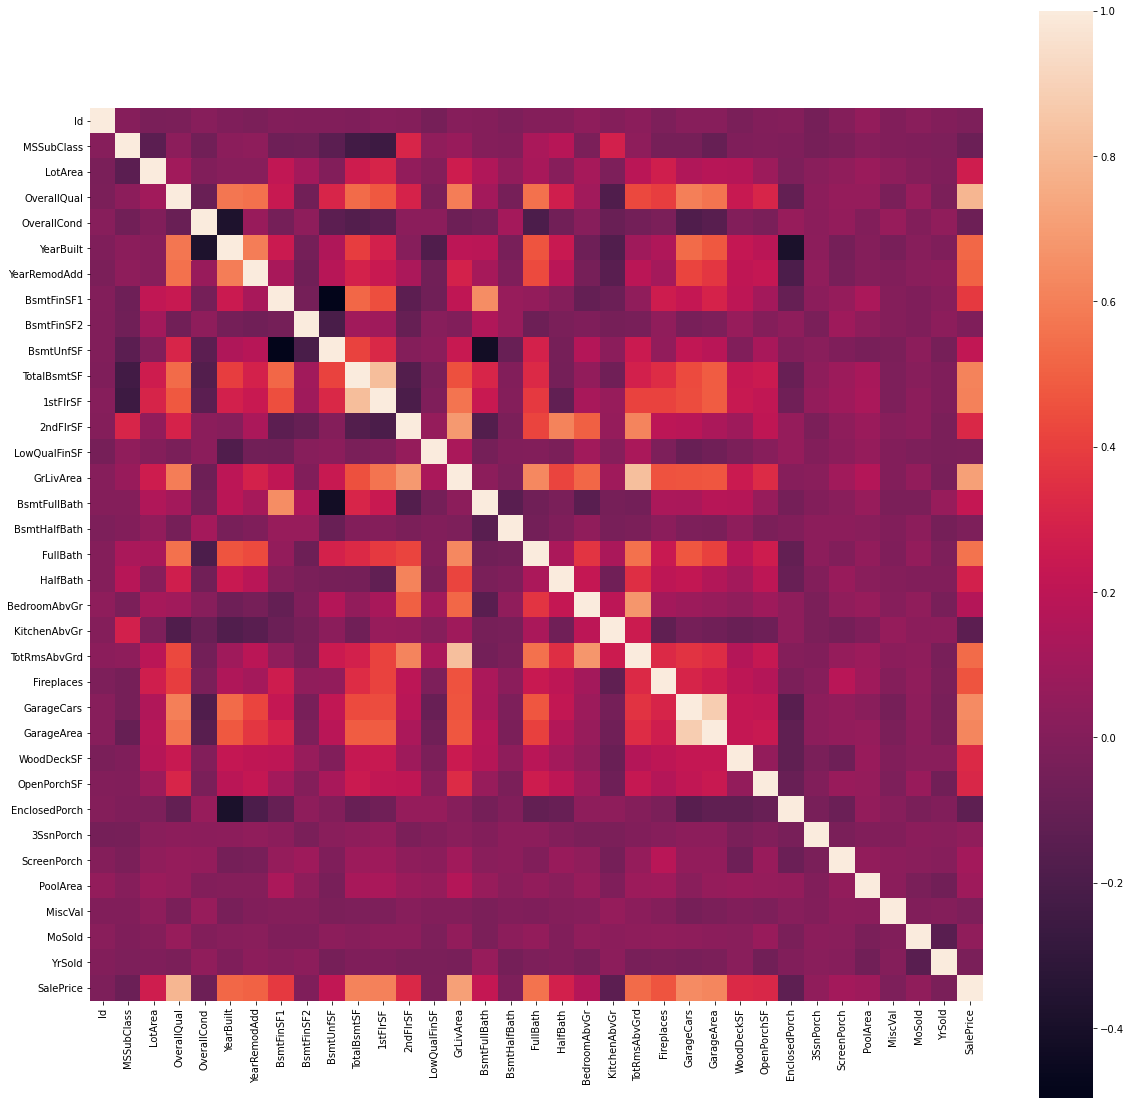

In [19]:
#Lets check the correlation matrix to find any unforeseen relations
corr_mat=df_data.corr()

fi,ax=plt.subplots(figsize=(20,20))
sns.heatmap(corr_mat,square=True)

In [22]:
#Though column ‘ID’ seems to have no correlation to all the columns but there is no use in modelling as its just row number. So we can remove it too.
del df_data['Id']

There are many columns that are categorical. We need to perform one hot encode them.

In [24]:
le=LabelEncoder()
cat_mask= df_data.dtypes=='object'
cat_cols= df_data.columns[cat_mask].tolist()
cat_cols

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

In [25]:
#Lets convert the columns to one hot encoding
df_data[cat_cols]=df_data[cat_cols].apply(lambda x: le.fit_transform(x.astype(str)))
df_data_c = df_data.copy()
#get_dummies is used for one hot encoding
df_data_c = pd.get_dummies(df_data_c,columns=cat_cols)

In [28]:
df_data_c['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1459, dtype: int64

In [29]:
#Now the data is ready for modelling. Before that we need to split the data into train and test.

x_train, x_test, y_train, y_test = train_test_split(df_data_c.drop('SalePrice',axis=1),df_data_c['SalePrice'], test_size =0.25,random_state=120)
y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)

In [30]:
#Normalize the values in train and test using Standard Scaler function
sc_X = StandardScaler()
sc_y = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.fit_transform(x_test)
y_train = sc_X.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

Let’s now fit a linear regression model on the data

In [31]:
lm = LinearRegression()
lm.fit(x_train,y_train)

#predictions on train data
x_pred = lm.predict(x_train)
x_pred = x_pred.reshape(-1,1)

x_pred

array([[ 0.87065707],
       [ 0.95255862],
       [-0.02975645],
       ...,
       [-0.98491564],
       [-0.32122316],
       [ 5.56128226]])

In [33]:
#Prediction of validation data
y_predictions = lm.predict(x_test)
y_predictions= y_predictions.reshape(-1,1)
y_predictions

array([[ 7.00748134e+09],
       [ 2.14199525e+10],
       [-4.42394457e+09],
       [ 6.79905954e+10],
       [ 3.54423692e+10],
       [ 2.46096531e+09],
       [-1.96545264e+09],
       [ 5.80646585e+10],
       [-9.86379720e+09],
       [-1.02281322e+10],
       [ 7.02517873e+10],
       [ 4.42432938e+08],
       [-8.96355558e+10],
       [-1.28631362e+11],
       [ 1.68959466e+10],
       [-1.41367186e+10],
       [ 1.19222997e+09],
       [ 2.19699726e+10],
       [-5.80622849e+10],
       [-2.45448511e+09],
       [ 7.55512725e+09],
       [-7.12357476e+10],
       [ 3.43013266e+10],
       [-3.00885718e+10],
       [ 8.62213955e+09],
       [ 6.88501799e+10],
       [-9.93601463e+10],
       [ 2.17314448e+10],
       [ 3.05404687e+10],
       [-4.43222724e+10],
       [-3.87992948e+10],
       [-1.12478014e+10],
       [ 1.15314388e+09],
       [-5.31451390e+10],
       [-1.72335049e+11],
       [-1.47452095e+10],
       [-8.51260618e+09],
       [ 1.27416665e+11],
       [-2.6

In [35]:
def scores_(y,x):
    print('MAE:', metrics.mean_absolute_error(y, x))
    print('MSE:', metrics.mean_squared_error(y, x))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y, x)))
    print('R2 Score:' ,metrics.r2_score(y,x))

print('InSample_accuracy')
scores_(y_train, x_pred)
print('---------------------------')
print('OutSample_accuracy')
scores_(y_test,y_predictions)

InSample_accuracy
MAE: 0.1828459849312525
MSE: 0.08080438090379947
RMSE: 0.2842611139494804
R2 Score: 0.9191956190962005
---------------------------
OutSample_accuracy
MAE: 29345417710.666924
MSE: 3.034299649072542e+21
RMSE: 55084477387.66832
R2 Score: -3.034299649072542e+21


The model performed really well on training data with a good 0.92 r2 score and < 1 RMSE score but with test data the performance is no where near good. This is a clear overfitting model. Reason might me because of numerous features. To tackle this we can perform Ridge and Lasso regularization.

**Lasso or l1 regularization:**

For a given range of alpha lets try to find out the RMSE scores of training(In sample) and test(Out sample) data sets.

AxesSubplot(0.125,0.125;0.775x0.755)


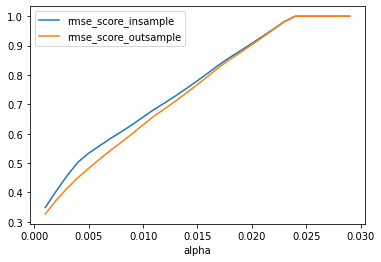

In [37]:
def regularization(model,alpha_range):
    rmse_score_insample=[]
    rmse_score_outsample=[]
    r2_score_insample=[]
    r2_score_outsample=[]
    for i in alpha_range:
        regularization = model(alpha=i,normalize=True)
        regularization.fit(x_train,y_train)
        y_pred_train = regularization.predict(x_train)
        y_pred_train = y_pred_train.reshape(-1,1)
        y_pred_test=regularization.predict(x_test)
        y_pred_test = y_pred_test.reshape(-1,1)
        rmse_score_insample.append(np.sqrt(metrics.mean_squared_error(y_train,y_pred_train )))
        rmse_score_outsample.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
        r2_score_insample.append(metrics.r2_score(y_train, y_pred_train))
        r2_score_outsample.append(metrics.r2_score(y_test, y_pred_test))
    
    df=pd.DataFrame()
    df['alpha']=alpha_range
    df['rmse_score_insample'] = rmse_score_insample
    df['rmse_score_outsample']= rmse_score_outsample 
    df['r2_score_insample'] = r2_score_insample
    df['r2_score_outsample'] = r2_score_outsample
    return df.plot(x = 'alpha', y = ['rmse_score_insample', 'rmse_score_outsample'])
alpha_range_lasso = np.arange(0.001,0.03,0.001)
print(regularization(Lasso,alpha_range_lasso))

We can see that there is no huge difference in in sample and out sample RMSE scores so Lasso has resolved overfitting. One observation here is that after alpha= 0.017 there is no difference in RMSE scores of In sample and Out sample. Let us also check for Ridge

**Ridge or l2 regularization:**

AxesSubplot(0.125,0.125;0.775x0.755)
At alpha = 0.1 the model performs good


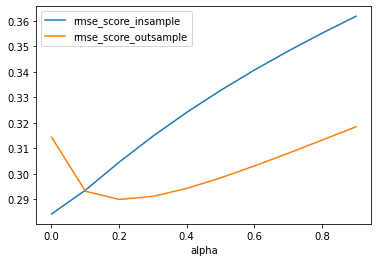

In [39]:
alpha_range_ridge = np.arange(0.001,1,0.1)
print(regularization(Ridge,alpha_range_ridge))
#writing functions helps reduce redundant lines of code as seen #above we can just input the parametre Ridge or Lasso
print('At alpha = 0.1 the model performs good')

We see in the graph that around alpha=0.1 there is no much difference in the RMSE scores and clearly there is no sign of over fitting as there is very less difference of insample and outsample RMSE scores as compared to huge difference in Linear Regression.

By comparing Lasso and Ridge RMSE or R2 and we can pick the model that has good score as desired for the problem statement.